######The latest version of this IPython notebook is available at [https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop](https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop) under the [MIT License](https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop/blob/master/LICENSE).

J.C. Kantor (Kantor.1@nd.edu)

# Energy Dispersing Air Bag Landing Systems

<p><a href="http://commons.wikimedia.org/wiki/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg#/media/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg/1200px-thumbnail.jpg" alt="A pallet loaded with heavy cargo is airdropped from a C-130 Hercules aircraft during tactical airdrop training flight for members of the 345th Tactical Airlift Squadron DF-ST-91-10084.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg#/media/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg">A pallet loaded with heavy cargo is airdropped from a C-130 Hercules aircraft during tactical airdrop training flight for members of the 345th Tactical Airlift Squadron DF-ST-91-10084</a>" by Tech. Sgt. James R. Ferguson - <a rel="nofollow" class="external free" href="http://www.defenseimagery.mil/imageRetrieve.action?guid=1f916304399ca162bfaf704e192b4d085b093844&amp;t=2">http://www.defenseimagery.mil/imageRetrieve.action?guid=1f916304399ca162bfaf704e192b4d085b093844&amp;t=2</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

In [26]:
#Initializations
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import math
pi = math.pi

from pint import UnitRegistry
ur = UnitRegistry()

## Air Bag Landing Systems


<div style="float: right;">
<img style="margin: 20px; width: 200px;" src="../images/AirBag03.png" />
<br>
<img style="margin: 20px; width: 200px;" src="../images/AirBag04.jpg"/>
<br>
<img style="width: 200px;" src="../images/AirBag01.png" />
<br>
<img style="width: 200px;" src="../images/AirBag05.png" />
</div>
Air bag landing systems have been adapted to a wide range of uses including space vehicle recovery, planetary exploration, humanitarian supply missions, and field delivery of military supplies. The purpose of the airbags is to dissipate the landing energy and thereby safely and securely deliver cargo to the ground.  A typical mission profile is shown in the following diagram (Figure 1 from Wen, et. al, 2010).

The air bags are stored in a folded position underneath a payload platform. Upon exiting the aircraft, the parachute deploys and the air bags arefilled by ram air entering through a one-way vent. After initial contact with the ground, the lower vent closes and bag pressure builds due to the payload momentum. A membrane covering the upper vent bursts at a pre-determined pressure after which the airbag continues to collapse until the payload finally and safely touches down. [This](http://www.combatreform.org/T-21.htm) image shows deployment of Russian towed artillary piece.

A typical airbag design for delivering military cargo is shown in these figures (courtesy of Duramold, Inc.). In this configuration, the airbags are constructed in pairs, and two pairs (a total of four airbags) are installed beneath each 2 feet by nine feet section of a segmented payload platform. A typical platorm (Type V platform manufactured by Airlift Technologies, Inc.) is shown in the accompanying figure.

Typical operating parameters:

* Parachute descent velocity: 28 ft/sec
* Loading: 2000-4000 lbs per 2 foot segment, with a maximum loading of 250 lb/sq. ft. 
* Maximum g-force: 8g
* No bouncing

## Preliminary Analysis

This is a preliminary analysis to obtain an approximate model for the design analysis of an air bag system. For this purpose, the assumptions include ideal operation of all components, an airbag system of constant cross-sectional area, non-elastic materials, and the ideal gas law.

### Air Bag Dimensions

The dimensions of a typical airbag are taken from drawings provided by Duramold, Inc.

In [28]:
# specifications
height = 36.0 * ur.inches
diameter = 36.0 * ur.inches

# calculated 
area = 0.25*pi*diameter**2
volume = height*area

print "Airbag area = {0:8.3f}".format(area.to(ur.m**2))
print "Airbag volume = {0:8.3f}".format(volume.to(ur.L))

Airbag area =    0.657 meter ** 2
Airbag volume =  600.480 liter


### Initial Loading

We'll assume the initial velocity is the standard descent velocity of U.S. Army parachutes (28 ft/sec), and the acceptable landing velocity is 5 ft/sec.

In [29]:
# average loading per airbag
m_payload = 1500 * ur.lbs
v_initial = 28 * ur.feet/ur.sec
v_final = 5 * ur.feet/ur.sec

print "Payload Mass = {0:8.4f}".format(m_payload.to(ur.kg))
print "Initial Descent Velocity = {0:8.4f}".format(v_initial.to(ur.m/ur.sec))
print "Final Descent Velocity = {0:8.4f}".format(v_final.to(ur.m/ur.sec))

Payload Mass = 680.3886 kilogram
Initial Descent Velocity =   8.5344 meter / second
Final Descent Velocity =   1.5240 meter / second


### Energy Analysis

We can get a preliminary estimate of the forces and accelerations by assuming uniform  negative acceleration of the payload. This spreads the landing event over a maximum period, and gives a lower bound on the peak g-force to be experienced by the payload. We'll neglect the force of the parachute.

In [30]:
KE_initial = 0.5*m_payload*v_initial**2
KE_final = 0.5*m_payload*v_final**2

print "Initial KE = {0:8.3f}".format(KE_initial.to(ur.kJ))
print "  Final KE = {0:8.3f}".format(KE_final.to(ur.kJ))

Initial KE =   24.778 kilojoule
  Final KE =    0.790 kilojoule


In [31]:
# Average force
force = (KE_initial-KE_final)/height
print "Average Force = {0:8.3f}".format(force.to(ur.kN))
print "Average Force = {0:8.3f}".format(force.to(ur.lbf))

# Average pressure required
pressure = force/area
print "\nAverage Overpressure = {0:8.3f}".format(pressure.to(ur.kPa))
print "Average Overpressure = {0:8.3f}".format(pressure.to(ur.psi))

# Average decleration
acceleration = force/m_payload
print "Average Acceleration = {0:8.3f}".format(acceleration.to(ur.m/ur.s**2))

# Duration
t = (v_initial-v_final)/acceleration
print "Time = {0:8.3f}".format(t.to(ur.s))

Average Force =   26.234 kilonewton
Average Force = 5897.610 force_pound

Average Overpressure =   39.948 kilopascal
Average Overpressure =    5.794 psi
Average Acceleration =   38.557 meter / second ** 2
Time =    0.182 second


## Descent Phase

Starting at rest, to achieve a velocity $v$ in free-fall with gravitational acceleration $g$ with no other significant drags, the period of time required is 

$$ t_f = \frac{v}{g} $$ 

and the distance required is

$$ y_f = \frac{v^2}{2 g} $$

In [32]:
gravity = 9.81 * ur.m/ur.sec**2

tf = v_initial/gravity
print "Free Fall Time = {0:8.4f}".format(tf.to(ur.sec))

yf = (v_initial**2)/2.0/gravity
print "Free Fall Distance = {0:8.4f}".format(yf.to(ur.m))
print "Free Fall Distance = {0:8.4f}".format(yf.to(ur.ft))


Free Fall Time =   0.8700 second
Free Fall Distance =   3.7123 meter
Free Fall Distance =  12.1796 foot


The parachute descent is slow enough that the air flow is well approximated as an incompressible flow. Then from Bernoulli's law, the stagnation pressure at the bottom vent of the air bag is

$$ P_{total} = P_{ambient} + \frac{1}{2}\rho v^2$$

For these low pressures the ideal gas law provides an accurate equation of state. Then

$$ \rho = MW_{air}\frac{P_{ambient}}{R T_{ambient}} $$

Assuming the air bag fills at the stagnation pressure and equilibrates with the ambient temperature, thn mass of air in the air bag at the moment it touches down is given by

$$ m_{air} = MW_{air}\frac{P_{total} V}{R T_{ambient}} $$

In [33]:
P_ambient = 1.0 * ur.atm
T_ambient = ur.Quantity(15.0,ur.degC).to(ur.degK)

MW = 28.966 * ur.g/ur.mol
R = 8.314 * ur.J/ur.mol/ur.degK

rho = MW*P_ambient/(R*T_ambient)
rho.ito(ur.kg/ur.m**3)

print "Air density = {0:8.3f}".format(rho)

Air density =    1.225 kilogram / meter ** 3


In [34]:
# for low velocities, assume essentially incompressible flow
P_stagnation = 0.5*rho*v_initial**2
P_stagnation.ito(ur.Pa)

print "Stagnation Pressure = {0:8.5f}".format(P_stagnation)

Stagnation Pressure = 44.61619 pascal


In [35]:
P_initial = P_ambient + P_stagnation

print "Total Pressure = {0:8.5f}".format(P_initial)

Total Pressure =  1.00044 atmosphere


In [36]:
m_air = MW*P_initial*volume/(R*T_ambient)
print "Air mass = {0:8.3f}".format(m_air.to(ur.g))

Air mass =  735.980 gram


## Airbag Dynamics without Vent

Let $h$ denote the height of the cargo platform above the ground, and let $v$ denote velocity. At the moment the bottom of the air bag touches down, the dynamics become

\begin{align*}
\frac{dh}{dt} & = v \\
\frac{dv}{dt} & = \frac{(P_{bag}-P_{ambient})A_{bag}}{m_{payload}} - g
\end{align*}

where

\begin{align*}
h(0) & = H_{bag} \\
v(0) & = -v_{parachute}
\end{align*}

$v_{parachute}$ is descent velocity from the parachute deployment phase, and $H_{bag}$ is the height of the bag when fully extended. We assume the parachute drag is immediately released upon touchdown.

The bottom inlet vent immediately closes on touchdown. The air mass in the bag is constant until the upper vent membrane bursts. For this first analysis, we'll assume the vent membrane remains intact.

$$
\frac{dE}{dt}=\dot{Q}+\dot{W}
$$

where $\dot{Q}$ is the heat transferred to the system from the surroundings and $\dot{W}$ is the work done on the system. The entire compression phase is only a few hundred milliseconds, so to a good approximation the adiabatic assumption $\dot{Q} = 0$ holds.

The specific energy of an ideal gas is a function of temperature alone, so

\begin{aligned}
\frac{dE}{dt} & =\frac{d(n_{air}\hat{U})}{dt}\\
 & =n_{air}\frac{d\hat{U}}{dt}\\
 & =n_{air}\frac{\partial\hat{U}}{\partial T}\frac{dT}{dt}\\
 & =n_{air}C_{v}\frac{dT}{dt}
\end{aligned}


On the work side of the equation, the rate of work done on the system ($\dot{W}$)

\begin{aligned}
\dot{W} & = - P \frac{dV}{dt}
\end{aligned}

Giving an energy balance

$$ n_{air}C_{v}\frac{dT}{dt} = -P\frac{dV}{dt} $$

Since it is pressure that appears in other parts of the model, we'd like to have the left side of this equation in terms of pressure. Substituting the ideal gas and taking a total derivative of temperature gives

$$ \frac{C_{v}}{R}\left(V \frac{dP}{dt} + P\frac{dV}{dt}\right) = -P\frac{dV}{dt} $$

or

$$ \frac{1}{P} \frac{dP}{dt} = -\left(1+\frac{R}{C_v}\right) \frac{1}{V} \frac{dV}{dt} $$

For an ideal gas, $C_p = R + C_v$. Rearranging we get

$$ \frac{dP}{dt} = - \frac{P}{V} \left(\frac{C_p}{C_v}\right)\frac{dV}{dt}$$

Putting this all together for a constant area ($V = hA$) leaves a system of three differential equations with well-defined initial conditions for the initial compression phase of the air bag.


In [37]:
R = 8.314 * ur.J/(ur.mol*ur.degK)
MW = 28.966 * ur.grams/ur.mol

P_ambient = 1.0 * ur.atm

\begin{align*}
\frac{dh}{dt} & = v \\
\frac{dv}{dt} & = \frac{(P - P_{ambient})A}{m_{payload}} - g \\
\frac{dP}{dt} & = -\frac{P}{h} \left(\frac{C_p}{C_v}\right)v
\end{align*}

where

\begin{align*}
h(0) & = H_{bag} \\
v(0) & = -v_{parachute} \\
P(0) & = P_{total}
\end{align*}

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Convert all parameters to base units 
gravity = 9.81 * ur.m/ur.sec**2
k = 1.4
area.ito(ur.m**2)
m_payload.ito(ur.kg)
P_ambient.ito(ur.Pa)

# Verify parameter values, some calculated in earlier cells

print "gravity = {0:8.4f}".format(gravity)
print "k = {0:8.4f}".format(k)
print "area = {0:8.4f}".format(area)
print "m_payload = {0:8.4f}".format(m_payload)
print "P_ambient = {0:8.4f}".format(P_ambient)

# Set and verify initial conditions

h_ic = (height.to(ur.m)).magnitude
v_ic = (-v_initial.to(ur.m/ur.sec)).magnitude
P_ic = (P_initial.to(ur.Pa)).magnitude

x0 = [h_ic, v_ic, P_ic]

print "\nInitial Conditions for Initial Compression Phase"
print "h_ic = {0:8.4f}".format(h_ic)
print "v_ic = {0:8.4f}".format(v_ic)
print "P_ic = {0:8.1f}".format(P_ic)

def phase1(x,t):
    h,v,P = x
    dhdt = v
    if h > h_ic:
        dvdt = -gravity.magnitude
        dPdt = 0
    else:
        dvdt = -gravity.magnitude + \
            (P-P_ambient.magnitude)*area.magnitude/m_payload.magnitude
        dPdt = -P*k*dhdt/h
    return np.array([dhdt,dvdt,dPdt])

t = np.linspace(0,3.00,1000)
soln = odeint(phase1,x0,t);

h = soln[:,0] * ur.m
v = soln[:,1] * ur.m/ur.sec
P = soln[:,2] * ur.Pa

gForce = (P - P_ambient)*area/m_payload/gravity

Pr = P/P_initial.to(ur.Pa)
Tr = Pr**(2.0/7.0)

T = Tr*T_ambient

gravity =   9.8100 meter / second ** 2
k =   1.4000
area =   0.6567 meter ** 2
m_payload = 680.3886 kilogram
P_ambient = 101325.0000 pascal

Initial Conditions for Initial Compression Phase
h_ic =   0.9144
v_ic =  -8.5344
P_ic = 101369.6


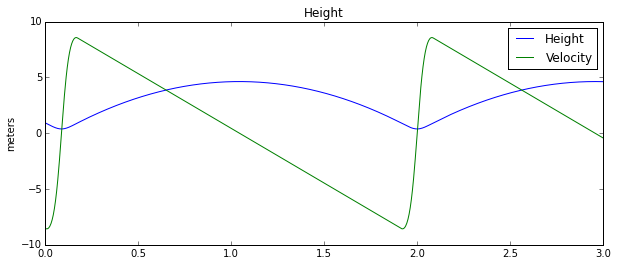

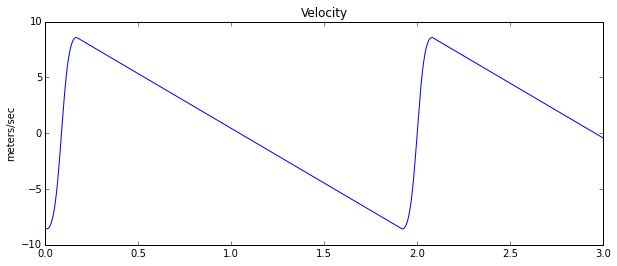

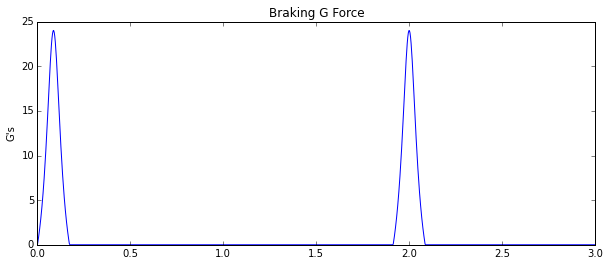

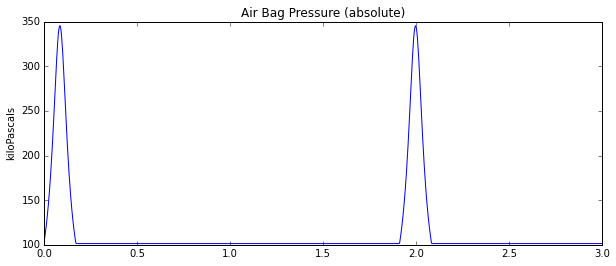

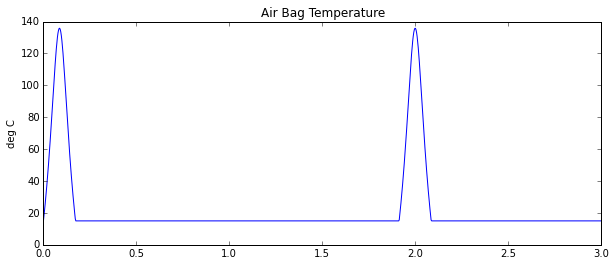

In [39]:
plt.figure(figsize=(10,4))
plt.plot(t,h,t,v)
plt.title('Height')
plt.ylabel('meters')
plt.legend(['Height','Velocity'])

plt.figure(figsize=(10,4))
plt.plot(t,v)
plt.title('Velocity')
plt.ylabel('meters/sec')

plt.figure(figsize=(10,4))
plt.plot(t,gForce)
plt.title('Braking G Force')
plt.ylabel("G's")

plt.figure(figsize=(10,4))
plt.plot(t,P.to(ur.kPa))
plt.title('Air Bag Pressure (absolute)')
plt.ylabel('kiloPascals')

plt.figure(figsize=(10,4))
plt.plot(t,T.to(ur.degC))
plt.title('Air Bag Temperature')
plt.ylabel('deg C')

## Venting Air Bag

### Mass Balance

Venting the air bag provides a mechanism to release accumulated energy. The mass balance is given by 

$$\frac{d\left(\rho V\right)}{dt} = - C_DA_o \rho_{o} q_{o}$$

where $\rho_o$ and $q_o$ refer to the density and velocity of the exit gas at the orifice conditions, and where $A_o$ is the area of the orifice. For unchoked flow, the density and pressure at the orifice are equal to ambient conditions, so $\rho_o  = \rho_a$.

The air bag is compressed by the rapid deacceleration of the payload. From an adiabatic energy balance on an ideal gas, the pressure and density of the remaining air inside the bag increase follow the relationship

$$\frac{\rho}{\rho_a} = \left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}}$$

where the subscript $a$ refers to ambient conditions. Applying the chain rule

$$\rho\frac{dV}{dt} + V\frac{d\rho}{dt} = - C_DA_o \rho_{a} q_{o}$$

$$\frac{V\rho_a}{\gamma P_a}\left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}-1}\frac{dP}{dt}
= - C_DA_o \rho_a q_o -  \rho_a\ \left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}} \frac{dV}{dt}$$

Cancelling terms

$$\frac{V}{\gamma P_a}\left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}-1}\frac{dP}{dt}
= - C_DA_o q_o - \left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}} \frac{dV}{dt}$$

$$\frac{V}{\gamma P_a}\left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}}\frac{P_a}{P}\frac{dP}{dt}
= - C_DA_o q_o - \left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}} \frac{dV}{dt}$$

Leaving 

$$\frac{1}{P}\frac{dP}{dt}
= - \frac{\gamma C_DA_o q_o}{V \left(\frac{P}{P_a}\right)^{\frac{1}{\gamma}}} - \frac{\gamma}{V}\frac{dV}{dt}$$

### Bernoulli's Equation

To a close approximation, energy balances on the streamlines from the interior of the airbag satisfy Bernoulli's law

$$\frac{\gamma}{\gamma-1} \frac{P_o}{\rho_o} + \frac{q_o^2}{2} + gz_o = \mbox{constant}$$

For unchoked flow, $P_o = P_a$ and $\rho_o = \rho_a$ at the orifice. Assuming a vent with a small cross-sectional area compared to the bag dimensions, and neglecting minor elevation effects,

$$\frac{q_o^2}{2} + \frac{\gamma}{\gamma-1} \frac{P_a}{\rho_a} = \frac{\gamma}{\gamma-1} \frac{P}{\rho} $$

so solving for $q_o$ and using the adiabatic relationship one more time

$$q_o =\sqrt{\frac{2\gamma}{\gamma-1}\frac{P_a}{\rho_a}\left[\left(\frac{P}{P_a}\right)^{1-\frac{1}{\gamma}} - 1\right]}$$

Using the ideal gas relationship

$$ \frac{P_a}{\rho_a} = \frac{R T_a}{MW}$$

leaves an expression for orifice velocity

$$q_o =\sqrt{\frac{2\gamma}{\gamma-1}\frac{R T_a}{MW}\left[\left(\frac{P}{P_a}\right)^{1-\frac{1}{\gamma}} - 1\right]}$$



gravity =   9.8100 meter / second ** 2
k =   1.4000
area =   0.6567 meter ** 2
m_payload = 680.3886 kilogram
P_ambient = 101325.0000 pascal
T_ambient = 288.1500 kelvin

Initial Conditions for Initial Compression Phase
h_ic =   0.9144
v_ic =  -8.5344
P_ic = 101369.6


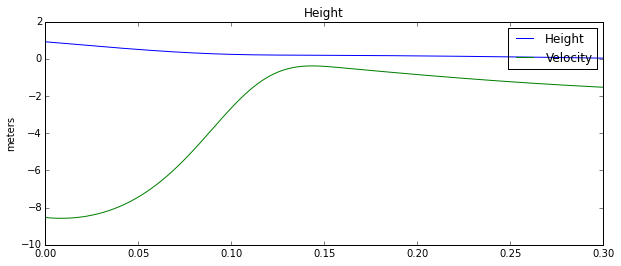

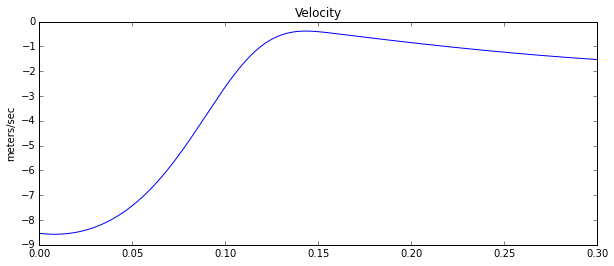

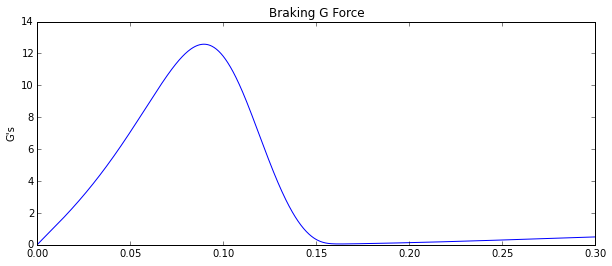

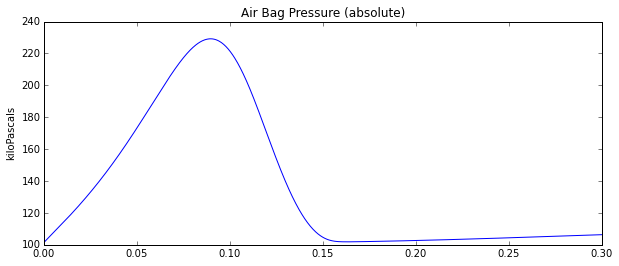

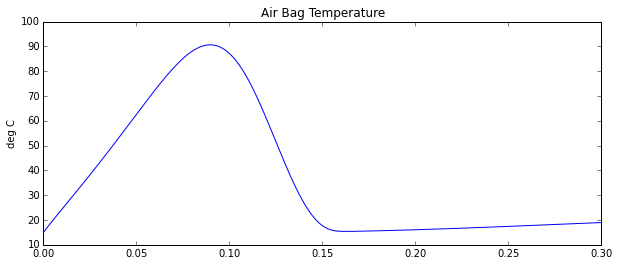

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# orifice parameters

Cd = 0.72
Ao = 20*8 * ur.cm**2

# air parameters
k = 1.4
gamma = k
MW = 0.028966 * ur.kg/ur.mol

# Convert all parameters to base units 
gravity = 9.81 * ur.m/ur.sec**2
k = 1.4
area.ito(ur.m**2)
m_payload.ito(ur.kg)
P_ambient.ito(ur.Pa)
T_ambient.ito(ur.degK)
Ao.ito(ur.m**2)

# Verify parameter values, some of which were calculated above

print "gravity = {0:8.4f}".format(gravity)
print "k = {0:8.4f}".format(k)
print "area = {0:8.4f}".format(area)
print "m_payload = {0:8.4f}".format(m_payload)
print "P_ambient = {0:8.4f}".format(P_ambient)
print "T_ambient = {0:8.4f}".format(T_ambient)

# Set and verify initial conditions

h_ic = (height.to(ur.m)).magnitude
v_ic = (-v_initial.to(ur.m/ur.sec)).magnitude
P_ic = (P_initial.to(ur.Pa)).magnitude

x0 = [h_ic, v_ic, P_ic]

print "\nInitial Conditions for Initial Compression Phase"
print "h_ic = {0:8.4f}".format(h_ic)
print "v_ic = {0:8.4f}".format(v_ic)
print "P_ic = {0:8.1f}".format(P_ic)

def phase1(x,t):
    h = x[0]
    v = x[1]
    P = x[2]
    pr = P/P_ambient.magnitude
    cr = ((gamma+1)/2.0)**(gamma/(gamma-1.0))
    #if pr > cr:
        #q = np.sqrt(gamma*R.magnitude*T_ambient.magnitude/MW.magnitude)
        #q = q*np.sqrt((2/(gamma+1))**((gamma+1)/(gamma-1)))
    # else:
        #q = np.sqrt(2*(gamma/(gamma-1))*(R.magnitude*T_ambient.magnitude/MW.magnitude))
        #q = q*np.sqrt(pr**(1.0 - (1.0/gamma))-1.0)
    if pr > cr:
        pr = cr
    q = np.sqrt(2*(gamma/(gamma-1))*(R.magnitude*T_ambient.magnitude/MW.magnitude))
    q = q*np.sqrt(pr**(1.0 - (1.0/gamma))-1.0)
    dhdt = v
    if h > h_ic:
        dvdt = -gravity.magnitude
        dPdt = 0
   # elif h <= 0.01:
   #     dhdt = 0
    #    dvdt = 0
    #    dPdt = 0
    else:
        dvdt = -gravity.magnitude + \
            (P-P_ambient.magnitude)*area.magnitude/m_payload.magnitude
        dPdt = -P*k*dhdt/h - P*gamma*Cd*Ao.magnitude*q/(h*area.magnitude*pr**(1.0/gamma))
    return np.array([dhdt,dvdt,dPdt])

t = np.linspace(0,0.3,1000)
soln = odeint(phase1,x0,t);

h = soln[:,0] * ur.m
v = soln[:,1] * ur.m/ur.sec
P = soln[:,2] * ur.Pa

gForce = (P - P_ambient)*area/m_payload/gravity

Pr = P/P_initial.to(ur.Pa)
Tr = Pr**(2.0/7.0)

T = Tr*T_ambient

plt.figure(figsize=(10,4))
plt.plot(t,h,t,v)
plt.title('Height')
plt.ylabel('meters')
plt.legend(['Height','Velocity'])

plt.figure(figsize=(10,4))
plt.plot(t,v)
plt.title('Velocity')
plt.ylabel('meters/sec')

plt.figure(figsize=(10,4))
plt.plot(t,gForce)
plt.title('Braking G Force')
plt.ylabel("G's")

plt.figure(figsize=(10,4))
plt.plot(t,P.to(ur.kPa))
plt.title('Air Bag Pressure (absolute)')
plt.ylabel('kiloPascals')

plt.figure(figsize=(10,4))
plt.plot(t,T.to(ur.degC))
plt.title('Air Bag Temperature')
plt.ylabel('deg C')

## Crush Zone Dynamics

We'll assume that a 3 inch crush zone of cardboard honeycomb or other structure is the final cushion for the falling mass. We'll further assume the maximum tolerable de-acceleration rate is 8g. From this data we can determine the maximum permissable velocity of the payload at completion of the air bag phase.

In [41]:
max_accel = 8*g
h_crush = 3.0 * ur.inches

t_crush = np.sqrt(2.0*h_crush/max_accel)
print "Crush Zone Time = {0:8.4f}".format(t_crush.to_base_units())

v_crush = max_accel*t_crush
print "Crush Zone Velocity = {0:8.4f}".format(v_crush.to_base_units())

NameError: name 'g' is not defined